In [1]:
# Harshal M Pohekar

# Wine Quality Prediction

In [2]:
# Packages and Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dataset 
df = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\archive_3\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# To see dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


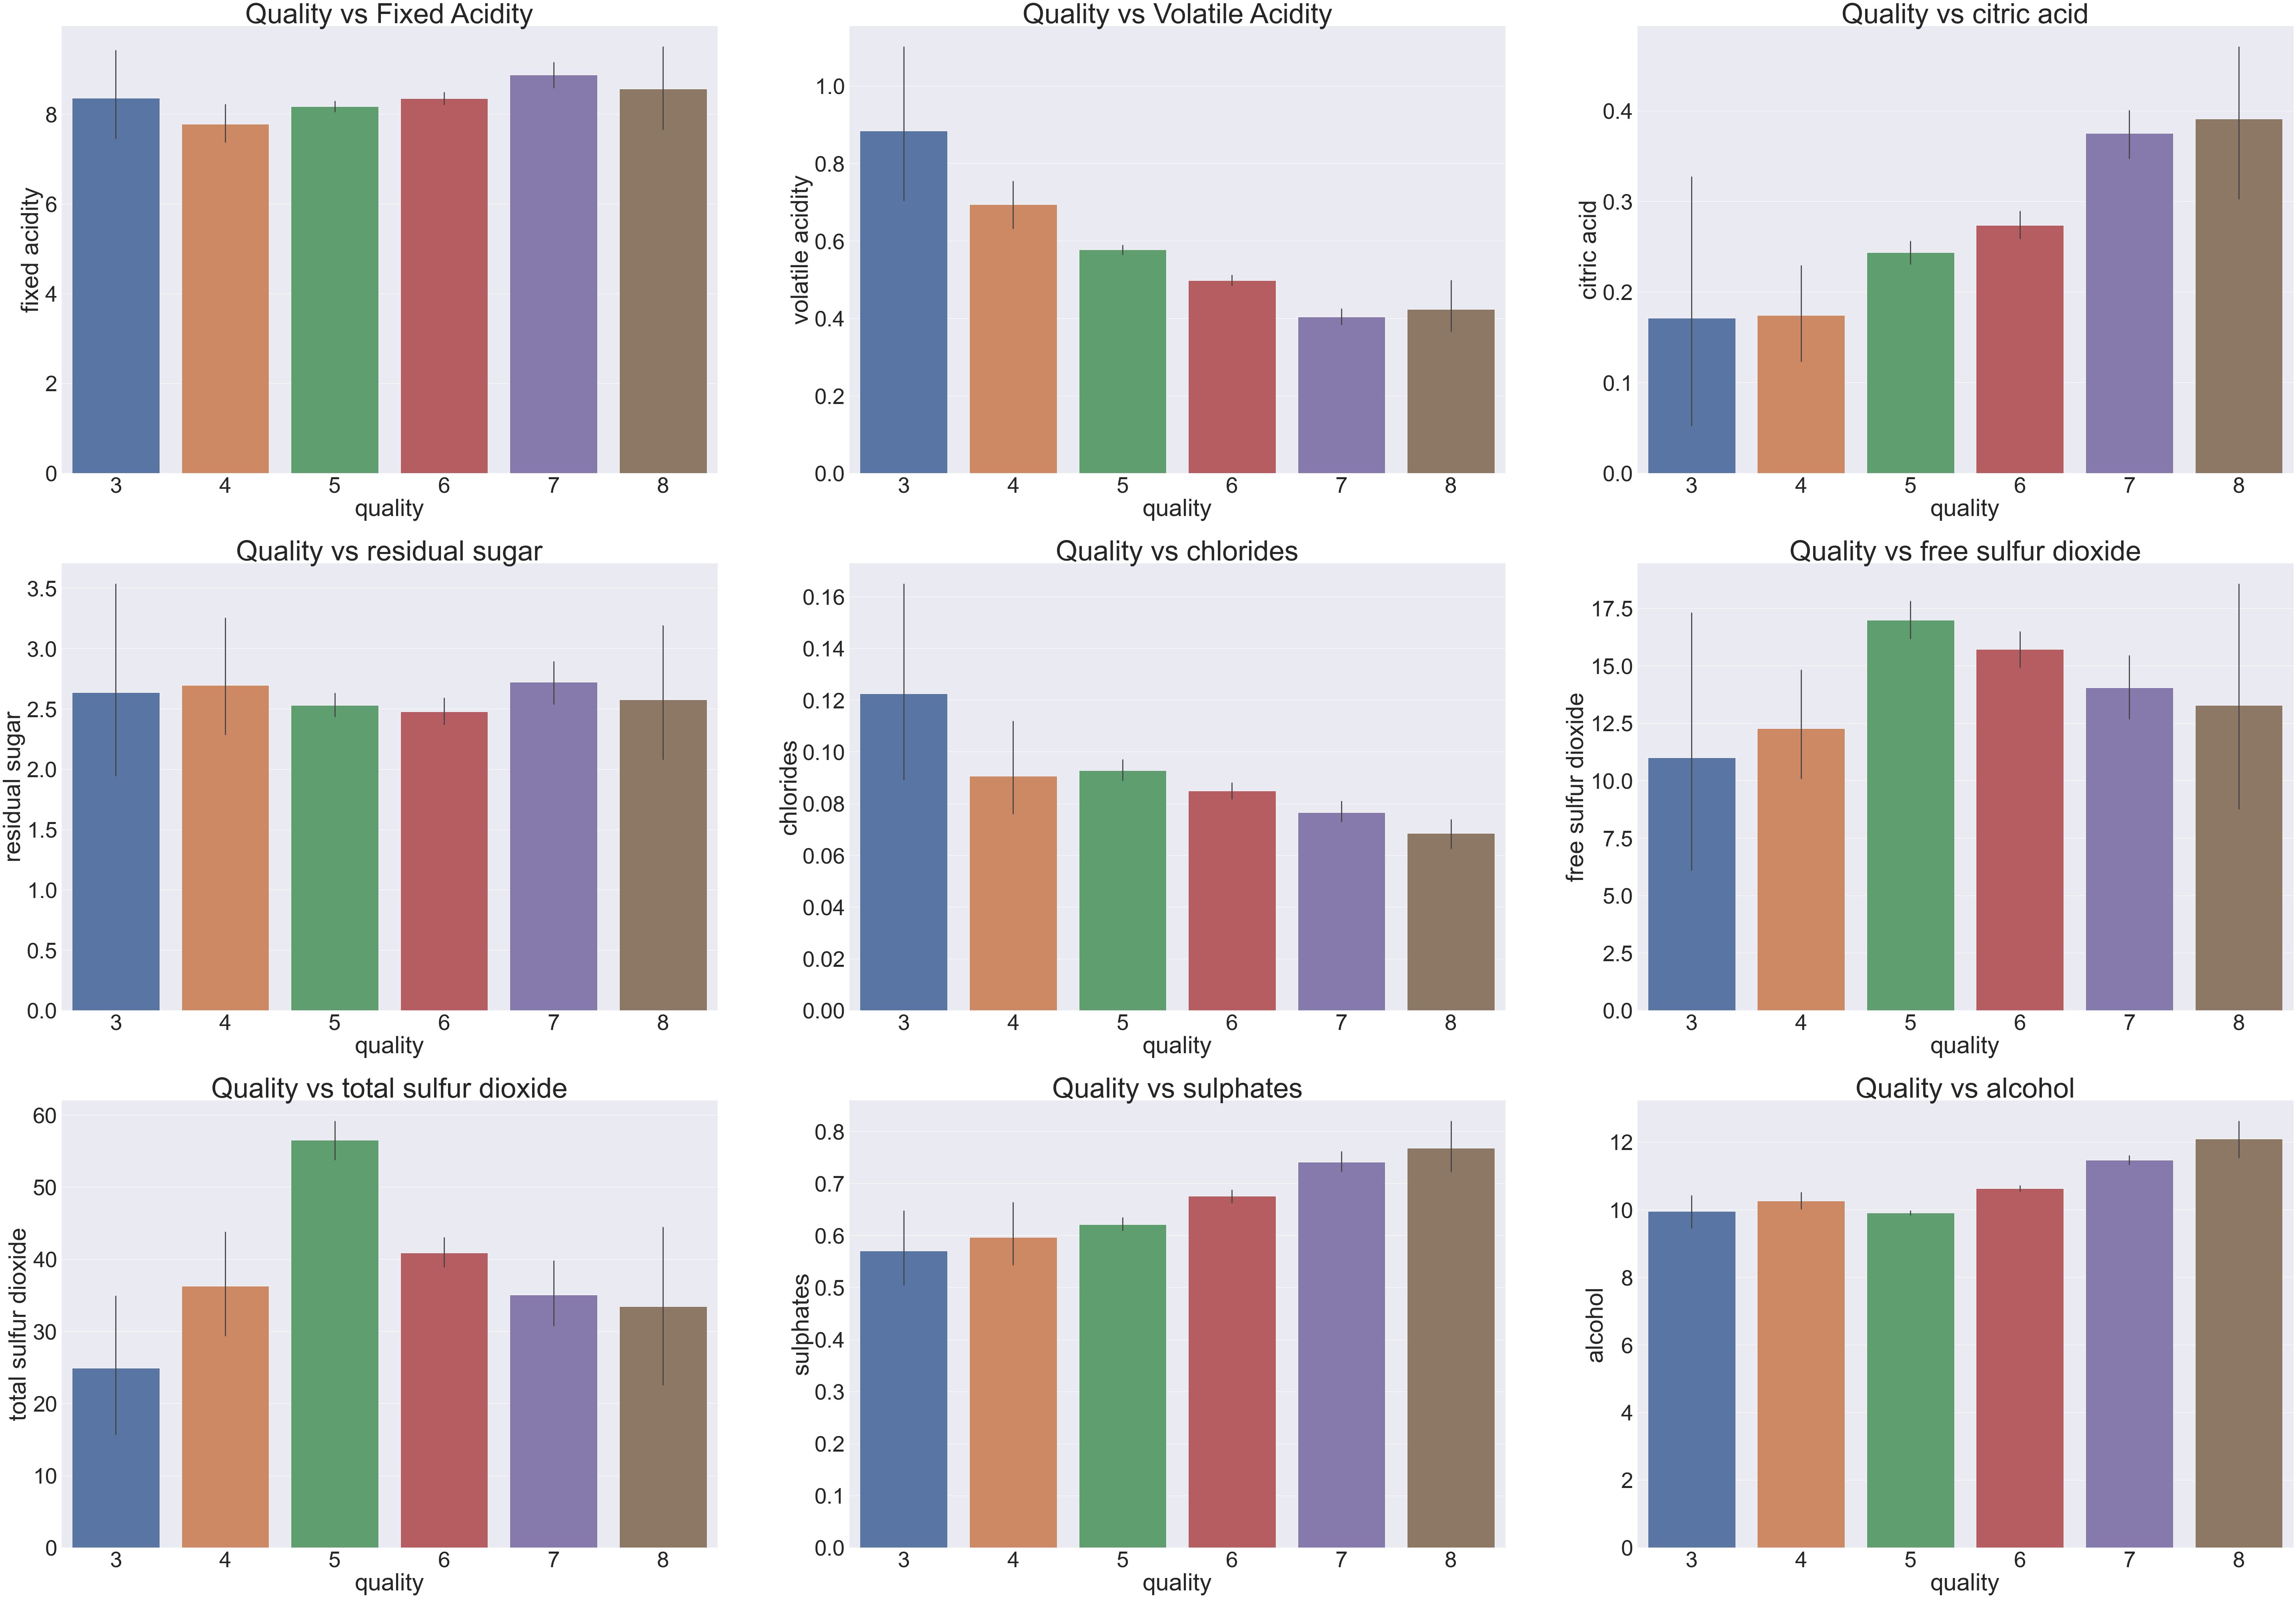

In [6]:
# Visualization of relation between Quality and other Columns
plt.figure(figsize = (100,70))
sns.set(font_scale = 5)
plt.subplot(331) # 3 row 3 column number left to right
plt.title("Quality vs Fixed Acidity", fontsize = 70)
sns.barplot(x = "quality", y = "fixed acidity", data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity", fontsize = 70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)


plt.subplot(333)
plt.title("Quality vs citric acid", fontsize = 70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs residual sugar", fontsize = 70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs chlorides", fontsize = 70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free sulfur dioxide", fontsize = 70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total sulfur dioxide", fontsize = 70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs sulphates", fontsize = 70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol", fontsize = 70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [7]:
# Quality category by using bins 2 to 6.5 (bad), and 6.5 to 8 (good)
bins = (2, 6.5, 8)
classes = ['bad', 'good']

# Segmentation and sorting values in bins continuos to categorical variable 
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classes)

In [8]:
# Encoding
label_quality = LabelEncoder()

In [9]:
# Changing quality column by encoded categories
df['quality'] = label_quality.fit_transform(df['quality'])

In [10]:
# count values
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

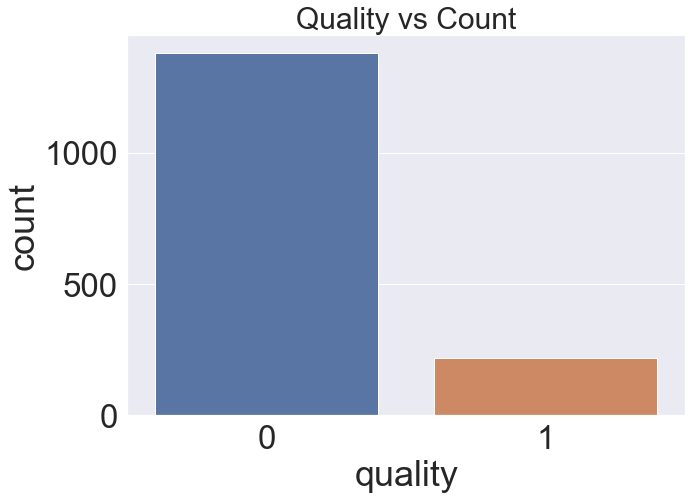

In [11]:
# 0 Bad and 1 is good, count plot
plt.figure(figsize = (10,7))
sns.set(font_scale = 3)
plt.title("Quality vs Count", fontsize = 30)
sns.countplot(df['quality'])

In [12]:
# dataframe, quality changed to 0 and 1
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [13]:
# Separating target variabel
x = df.drop('quality', axis = 1)
y = df['quality']

In [14]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [15]:
# Statndardization
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [16]:
# random Forest
# many decision trees, uses feature randomness and bagging while building each decision tree
# to forest of tress which are uncorrelated, , feature dont have any corelation,
# prediction as group of tree is more accurate than individual treee

In [17]:
# Random Forest Classifier trees = 100
RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_train, y_train)
pred_RF = RF.predict(x_test)

In [18]:
# traget and predicted target
pred1 = accuracy_score(y_test, pred_RF)
print(pred1 * 100)

89.6875


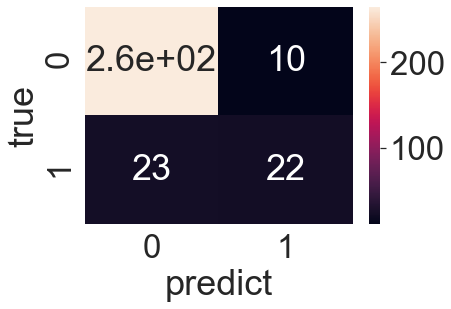

In [19]:
cm1 = confusion_matrix(y_test, pred_RF)
ax1 = sns.heatmap(cm1, annot=True)
ax1.set(xlabel='predict', ylabel='true')
plt.show()

In [20]:
# CF matrix

# True Positive =  Posirive predicted and it has come true
# True negative = negative predicted and it is true
# False Positive = Posirive predicted and it has come false, type 1 error
# False negative = negative predicted and it is false, type 2 error

In [21]:
# Logistic regression
# used for Classification, predective analysis algorithm based on probability
# sigmoid complex cos fun. = sigmoid fun =  1 +  1/ e^-z logistic fun
# 0 to 1 , to map prediction probabilities, output of classes based on probability by taking input trhough prediction function,
# proba score 0 to 1, 0.5 threshold below 1 class, above another class

logistic Regression accuracy score : 88.75


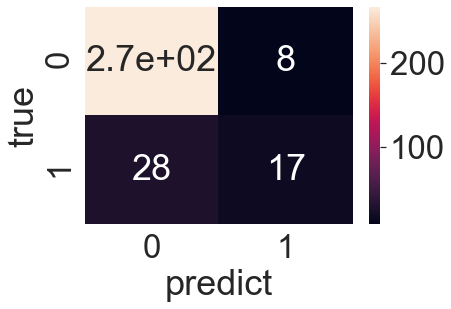

In [22]:
# Logistic Regression
# Instantiation by LR
LR = LogisticRegression().fit(x_train, y_train)
pred_LR = LR.predict(x_test)
cm2 = confusion_matrix(y_test, pred_LR)
ax2 = sns.heatmap(cm2, annot=True)
ax2.set(xlabel='predict', ylabel='true')
pred2 = accuracy_score(y_test, pred_LR)
print("logistic Regression accuracy score :", pred2*100)